## Comparing two groups with permutation testing

We return to the Brexit age data from [Where are the Brexiteers?](https://matthew-brett.github.io/les-pilot/brexit_problem.html).

Here’s the data from the processing we did in [Where are the Brexiteers?](https://matthew-brett.github.io/les-pilot/brexit_analysis.html):

* [remain_leave.csv](https://matthew-brett.github.io/les-pilot/_downloads/remain_leave.csv).

Download the data file from the link above if you haven’t already got it in
your Notebook directory.

In [1]:
import pandas as pd
remain_leave = pd.read_csv('remain_leave.csv')
remainers = remain_leave[remain_leave['brexit'] == 1]
brexiteers = remain_leave[remain_leave['brexit'] == 2]
# Confirm our proportions haven't changed
len(brexiteers) / (len(brexiteers) + len(remainers))

0.4114068441064639

For convenience we get our ages scores into lists for each group:

In [2]:
# We make a list from the Pandas column with the "list" function
brexit_ages = list(brexiteers['age'])
remain_ages = list(remainers['age'])
# Check our proportions again
len(brexit_ages) / (len(brexit_ages) + len(remain_ages))

0.4114068441064639

In [3]:
brexit_ages[:10]

[71, 60, 74, 61, 47, 56, 76, 35, 44, 38]

In [4]:
remain_ages[:10]

[37, 55, 37, 42, 69, 20, 38, 32, 58, 46]

Let’s put up the histograms of these two groups again:

In [5]:
%matplotlib inline

In [6]:
import matplotlib.pyplot as plt

(array([47., 49., 61., 63., 63., 90., 68., 66., 26.,  8.]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <a list of 10 Patch objects>)

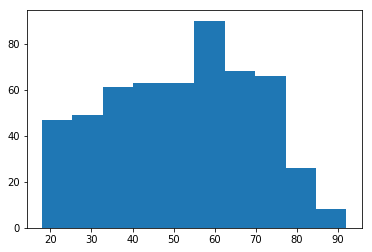

In [7]:
plt.hist(brexit_ages)

(array([112.,  90., 103.,  83.,  89.,  94.,  96.,  65.,  31.,  11.]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <a list of 10 Patch objects>)

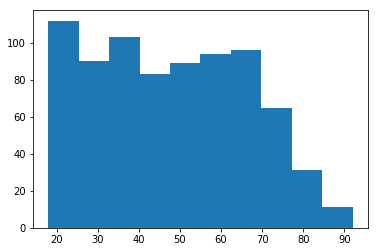

In [8]:
plt.hist(remain_ages)

The remainers look as though they may be a bit younger on average.

Let’s look at the mean age for the two groups.

The *mean* of the values in the list is defined as the sum divided by
the number of items.  Here is the mean age of the Brexit Leave voters:

In [9]:
sum(brexit_ages) / len(brexit_ages)

51.715341959334566

We can define a function to calculate the mean:

In [10]:
def mean(some_list):
    # Calculates the mean of the values in `some_list`
    return sum(some_list) / len(some_list)

Now we can get the mean with:

In [11]:
mean(brexit_ages)

51.715341959334566

The mean is lower for the Remain group:

In [12]:
mean(remain_ages)

48.01550387596899

The difference between the means is:

In [13]:
observed_difference = mean(brexit_ages) - mean(remain_ages)
observed_difference

3.6998380833655773

We see that the means of the two groups are different - but can we be
confident that this difference did not come about by chance?

What do we mean by chance?  Now we have to define our null hypothesis.

We hypothesize that there is in fact no difference between the ages of the two
groups.  We propose that the difference between the means we see could
reasonably occur if we did the following procedure:

* sample 541 + 774 = 1315 people from this same underlying
  doesn’t-matter-what-you-voted population;

* arbitrarily split this sample into a group of 541 and a group of 774, call
  these `group_A` and `group_B`;

* calculate the mean age for `group_A` and subtract the mean age of
  `group_B`;

Call this procedure - one trial.  To test our null hypothesis, we would like
to repeat this trial many times, recording the difference in means for each
trial. By doing this we could build up a distribution of the kind of
differences we would expect by chance - the sampling distribution.

But - we don’t have any more data - so we don’t have many new groups of 541 +
774 = 1315 to sample.  But it turns out, we can use the data we have to build
the distribution we need.

Let’s start with the null hypothesis - that there is no difference in the ages
of the Leave and Remain groups. If that hypothesis is true, then all the
ages in `brexit_ages` and in `remain_ages` can be considered as
being samples from the same underlying group.

To express this, I’m going to pool all the weights into one big group, like
this:

In [14]:
# The + below appends the second list to the first
all_ages = brexit_ages + remain_ages
len(all_ages)

1315

In this new pooled list, the first 541 ages are from the `brexit_ages` list,
and the rest are from the `remain_ages` list.

Now we have the new pooled list, we can do something similar to taking the new
`group_A` and `group_B` groups we imagined above.  That is, we can
*shuffle* the combined group to a random order, and split this shuffled
combined group into a group of 541 and a group of 774.  We get the difference
in means of these two groups, and store it.  We keep shuffling, to create more
`group_A` and `group_B` groups, and more differences in means. The
generated distribution of the mean differences is the distribution we expect
on the null hypothesis, that there is no real difference between the two
groups.  We can see where `observed_difference` lies in this generated
distribution, and this gives us a measure of whether the
`observed_difference` is likely on the null hypothesis.

Python’s `random.shuffle` function can do the shuffle for us (see:
[Shuffling list element order](https://matthew-brett.github.io/les-pilot/more_on_lists.html#list-shuffle)):

In [15]:
import random

Before shuffling, the first 541 age values are all for Leave voters.  Here are
the first 10:

In [16]:
# The first 10 ages before shuffling (all brexit)
all_ages[:10]

[71, 60, 74, 61, 47, 56, 76, 35, 44, 38]

Here’s a random shuffle of the combined list of ages:

In [17]:
random.shuffle(all_ages)
# The first 10 ages of the shuffled list, mixed brexit and remain.
all_ages[:10]

[24, 22, 81, 55, 72, 73, 41, 45, 55, 62]

To express all this, I’m going to make a function that takes the two lists,
joins them, shuffles, them and returns two new lists, that have a random
assortment of values from the original list:

In [18]:
# Just in case you haven't imported this already
import random

In [19]:
def join_shuffle_split(first_list, second_list):
    # Pool the lists, shuffle, split into lists of original length
    first_len = len(first_list)
    pooled = first_list + second_list
    random.shuffle(pooled)
    both = [pooled[:first_len], pooled[first_len:]]
    return both

Let’s check that is working as expected:

In [20]:
# Make a couple of lists
a_list = [0, 0, 0]
b_list = [99, 99, 99, 99]

In [26]:
# Call the function to shuffle the lists
join_shuffle_split(a_list, b_list)

[[0, 99, 99], [0, 99, 99, 0]]

In [ ]:
join_shuffle_split(a_list, b_list)

Now for our permutation test.  We’ve assumed the null hypothesis.  We join the
lists, and shuffle the combined group.  We’ll call the first 541 values
`group_A` and the last 774 values `group_B`.

In [27]:
fake_lists = join_shuffle_split(brexit_ages, remain_ages)
group_A = fake_lists[0]
group_B = fake_lists[1]

After the shuffling, the `group_A` group is a random mix of the
`brexit_ages` and `remain_ages` values, as is the `group_B` group.

Here is a function that takes the original lists, makes `group_A` and
`group_B`, and returns the difference in means.

In [28]:
def difference_in_means(first_list, second_list):
    """ Shuffle values across lists, calculate difference in means.
    """
    fake_lists = join_shuffle_split(first_list, second_list)
    group_A = fake_lists[0]
    group_B = fake_lists[1]
    return mean(group_B) - mean(group_A)

Let’s get the difference in means for these new groups, generated by the
shuffle:

In [38]:
difference_in_means(brexit_ages, remain_ages)

1.3216910974508878

That difference from the shuffled groups looks a lot less than the difference
we originally found:

In [39]:
observed_difference

3.6998380833655773

One difference is not enough.  We need more shuffled mean differences to see
whether `observed_difference` is really unusual compared to the range of
permuted group differences.  Here we run the shuffle procedure 10000 times, to
get a large range of values:

In [52]:
n_repeats = 10000
shuffled_differences = []  # An empty list to store the differences
for i in range(n_repeats):
    fake_difference = difference_in_means(brexit_ages, remain_ages)
    # Collect the new mean by adding to the end of the list
    shuffled_differences.append(fake_difference)

This gives us 10000 differences from groups that are compatible with our null
hypothesis.   We can now ask whether `observed_difference` is unusually
large compared to the distribution of these 10000 differences.

In [46]:
%matplotlib inline

In [47]:
# The plotting package
import matplotlib.pyplot as plt

(array([  24.,  194.,  932., 2195., 2974., 2395., 1008.,  240.,   34.,
           4.]),
 array([-3.62760846, -2.8302562 , -2.03290394, -1.23555169, -0.43819943,
         0.35915283,  1.15650508,  1.95385734,  2.7512096 ,  3.54856186,
         4.34591411]),
 <a list of 10 Patch objects>)

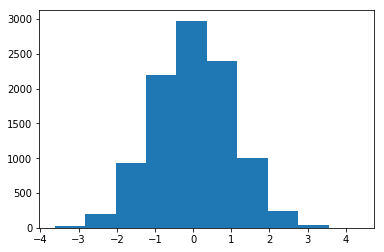

In [48]:
plt.hist(shuffled_differences)

The maximum of these differences is:

In [49]:
max(shuffled_differences)

4.345914112539219

Remember our `observed_difference`?

In [ ]:
observed_difference

So - how many of the `shuffled_differences` are greater than or equal to the
`observed_difference`?

In [53]:
n_greater_equal = 0
for i in range(n_repeats):
    if shuffled_differences[i] >= observed_difference:
        n_greater_equal = n_greater_equal + 1
n_greater_equal

1

In [51]:
2 / 10000

0.0002

In 10000 samples, we only found one sample greater than or equal to the
observed difference.

So, our estimate is that there is a 1 in 10000 chance that the observed
difference could have come about by differences in random sampling.